In [30]:
%matplotlib inline

######### Import Packages #########

In [31]:
import numpy as np
import nibabel as nib
from nilearn.connectome import ConnectivityMeasure
from brainspace.gradient import GradientMaps
from brainspace.gradient.alignment import ProcrustesAlignment,procrustes_alignment
import matplotlib.colors as colors
import matplotlib.pyplot as plt
print("Packages Imported Successfully")

Packages Imported Successfully


######### Load fsaverage5 template files #########

In [32]:
cort_lh = nib.freesurfer.read_label('/home/smadarlab/freesurfer/subjects/fsaverage5/label/lh.cortex.label')
cort_rh = nib.freesurfer.read_label('/home/smadarlab/freesurfer/subjects/fsaverage5/label/rh.cortex.label')
surf_lh_loc = nib.freesurfer.read_geometry('/home/smadarlab/freesurfer/subjects/fsaverage5/surf/lh.inflated')
surf_rh_loc = nib.freesurfer.read_geometry('/home/smadarlab/freesurfer/subjects/fsaverage5/surf/rh.inflated')
cort = np.concatenate((cort_lh, cort_rh + 10242))

print("fsaverage5 files loaded")

fsaverage5 files loaded


######### Load the subject data #########

In [33]:
subjs = ['0025427','0025429','0025428', '0025430', '0025431', '0025432', '0025433', '0025434', '0025435', '0025436', '0025437','0025438', '0025439', '0025440', '0025441', '0025442', '0025443', '0025444', '0025445', '0025446', '0025447','0025448', '0025449', '0025450', '0025451', '0025452', '0025453', '0025454', '0025455', '0025456']

ses = ["ses-01", "ses-02", "ses-10"]

print(f"We are going to use this subject IDs:{subjs} \n and we are going to use this sessions:{ses}\n")

We are going to use this subject IDs:['0025427', '0025429', '0025428', '0025430', '0025431', '0025432', '0025433', '0025434', '0025435', '0025436', '0025437', '0025438', '0025439', '0025440', '0025441', '0025442', '0025443', '0025444', '0025445', '0025446', '0025447', '0025448', '0025449', '0025450', '0025451', '0025452', '0025453', '0025454', '0025455', '0025456'] 
 and we are going to use this sessions:['ses-01', 'ses-02', 'ses-10']



######### Load Reference Data - This Version Daniel Gradients #########

In [34]:
data = []
for i in range(5):
    func_lh = rf'/home/smadarlab/DataspellProjects/Yvonne/Brainspace/parcellation_yvonne/fsaverage/hcp.embed.grad_{i + 1}.L.fsa5.func.gii'
    func_rh = rf'/home/smadarlab/DataspellProjects/Yvonne/Brainspace/parcellation_yvonne/fsaverage/hcp.embed.grad_{i + 1}.R.fsa5.func.gii'
    ts_lh = (nib.load(func_lh).darrays[0].data).flatten()
    ts_rh = (nib.load(func_rh).darrays[0].data).flatten()
    ts = np.concatenate((ts_lh, ts_rh))
    data.append(np.array(ts))
daniel_ts = np.array(data).T
np.savetxt("daniel_gradients_new.csv",np.asarray(data).T[cort],delimiter=",",header="G1,G2,G3,G4,G5")
print(f"Daniel Data gradients Shape: {daniel_ts.shape}")

Daniel Data gradients Shape: (20484, 5)


######### Configure the Model properties #########

In [35]:
model = "pca"
all_subjects = np.empty((3, len(subjs)), dtype=object)
lambda_all_subjects = np.empty((3*len(subjs)), dtype=object)

######### Computing the Correlation Matrices Using BrainSpace #########

In [36]:
# for v, se in enumerate(ses):
#     for k, s in enumerate(subjs):
#         clean_ts = np.load(('/home/smadarlab/DataspellProjects/Yvonne/Brainspace/ts_HNG_data/old '
#                             'files/ts_%s-%s_preproc_smoth6.npy' % (s, se)))
#         correlation_measure = ConnectivityMeasure(kind='correlation')
#         correlation_matrix = correlation_measure.fit_transform([clean_ts.T])[0]
#         print(f"Correlation Matrix Done for {s} - {se} and we end with:{len(correlation_matrix)}")
#         gm = GradientMaps(n_components=5, kernel='cosine', approach=model, random_state=0)
#         gm.fit(correlation_matrix)
#         all_subjects[v, k] = gm.gradients_
#         lambda_all_subjects[k+len(subjs)*(v-1)] = gm.lambdas_
#         print(f"finished Subject {s} ses {se}")
#         np.save(f"/home/smadarlab/DataspellProjects/Yvonne/Brainspace/correlation_mat_pca_BS/BS_corr_mat_pca_sub-{s}-ses-{se}.npy",all_subjects[v, k])
#         print(f"Matrix {s}-{se} saved")
# print(f"Correlation Matrix Done and we end with:{len(correlation_matrix)}")

In [37]:
# for i, g in enumerate(lambda_all_subjects):
#     np.save(f"/home/smadarlab/DataspellProjects/Yvonne/Brainspace/lambda_files/BS_mat{i}_lamda.npy", g)
#     print(f"Matrix {i} saved")

In [38]:

lambda_data = []
for i in range (0,len(subjs)*3):
    lambda_data.append(np.load(f'lambda_files/BS_mat{i}_lamda.npy'))
mean_array = np.mean(lambda_data, axis=0)


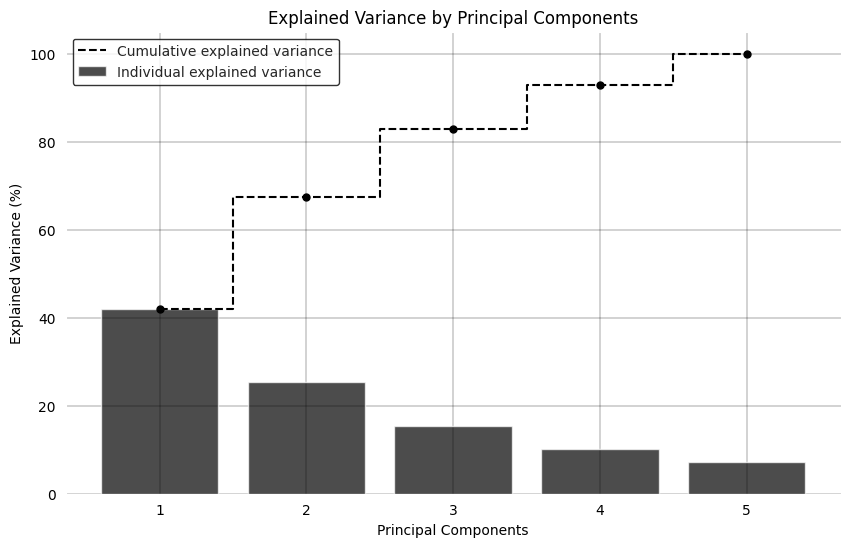

In [39]:
# Example eigenvalues (lambda_ values) obtained from PCA
lambda_values = mean_array

# Normalize eigenvalues to get the explained variance in percentage
explained_variance = lambda_values / np.sum(lambda_values) * 100

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Create the plot with a white background
fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Bar plot for individual explained variance in black with higher zorder
ax.bar(range(1, len(explained_variance) + 1), explained_variance, color='black', alpha=0.7, label='Individual explained variance', zorder=2)

# Line plot for cumulative explained variance in black with dashed line style and higher zorder
ax.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', color='black', linestyle='--', label='Cumulative explained variance', zorder=3)

# Adding markers for cumulative explained variance with higher zorder
ax.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, 'ko', markersize=5, zorder=3)

# Set labels and title in black with higher zorder
ax.set_xlabel('Principal Components', color='black', zorder=4)
ax.set_ylabel('Explained Variance (%)', color='black', zorder=4)
ax.set_title('Explained Variance by Principal Components', color='black', zorder=4)

# Set ticks color to black
ax.tick_params(colors='black', zorder=4)

# Legend in black with higher zorder
ax.legend(loc='best', frameon=True, facecolor='white', edgecolor='black')

# Set grid in black with lower zorder
ax.grid(True, color='black', linewidth=0.25, zorder=1)

# Save the plot as a PNG file with a white background
plt.savefig('BS_New_explained_variance_plot_bw.png', dpi=400, bbox_inches='tight', facecolor=fig.get_facecolor())

# Display plot
plt.show()

In [40]:
subj_data = []
for v, se in enumerate(ses):
    for k, s in enumerate(subjs):
        subj = np.load(f"/home/smadarlab/DataspellProjects/Yvonne/Brainspace/correlation_mat_pca_BS/BS_corr_mat_pca_sub-{s}-ses-{se}.npy")
        subj_data.append(subj)
    print(f"finished {se}")


finished ses-01
finished ses-02
finished ses-10


In [41]:
# flattened_array = all_subjects.flatten()
# all_subj = flattened_array.tolist()
# grad = [None] * len(all_subj)

In [42]:
all_subj = subj_data

In [43]:
aligned= procrustes_alignment(all_subj, reference=daniel_ts)

In [44]:
# test_aligned= procrustes_alignment(all_subjects, reference=daniel_ts)

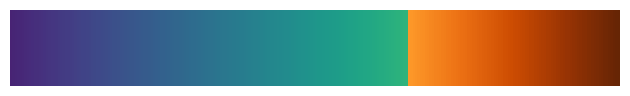

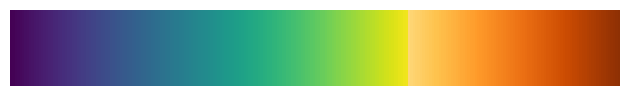

In [45]:


"""
Build our color map  
"""
first = int((128 * 2) - np.round(255 * (1. - 0.65)))
second = (256 - first)
colors2 = plt.cm.viridis(np.linspace(0.1, .65, first))
colors3 = plt.cm.YlOrBr(np.linspace(0.5, 1., second))
colors1 = plt.cm.viridis(np.linspace(0., .98, first))
colors4 = plt.cm.YlOrBr(np.linspace(0.3, 0.90, second))

# combine them and build a new colormap
cols1 = np.vstack((colors2, colors3))
cols2 = np.vstack((colors1, colors4))

mymap1 = colors.LinearSegmentedColormap.from_list('my_colormap1', cols1)

num = 256
gradient = range(num)
for x in range(5):
    gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=mymap1, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()

mymap2 = colors.LinearSegmentedColormap.from_list('my_colormap2', cols2)

num = 256
gradient = range(num)
for x in range(5):
    gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=mymap2, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()

In [46]:
avg_grad = [None] * 5
for component in range(5):
    avg_grad[component] = np.mean(np.asarray(aligned)[:,:,component],axis=0)

zero_grad = avg_grad
#avg_grad[0] = avg_grad[0]*-1
zero_grad = [np.zeros_like(arr) for arr in zero_grad]

In [47]:
from brainspace.datasets import load_fsa5
from brainspace.plotting import plot_hemispheres
from brainspace.utils.parcellation import map_to_labels

# Load fsaverage5 surfaces
surf_lh, surf_rh = load_fsa5()
#, label_text=['Grad1', 'Grad2', 'Grad3', 'Grad4', 'Grad5']
plot_hemispheres(surf_lh, surf_rh,array_name=avg_grad, size=(1200, 400),
                 color_bar=True, zoom=1,screenshot = False,filename="brainspace_plot_20k_20k.png", scale=(2, 2))
#plot_hemispheres(surf_lh_loc, surf_rh_loc, array_name=grad[0], size=(1200, 400), cmap='viridis_r',
#color_bar=True, label_text=['Grad1', 'Grad2', 'Grad3', 'Grad4', 'Grad5'], zoom=1.5)

In [48]:
new_data = [sublist[cort] for sublist in avg_grad]

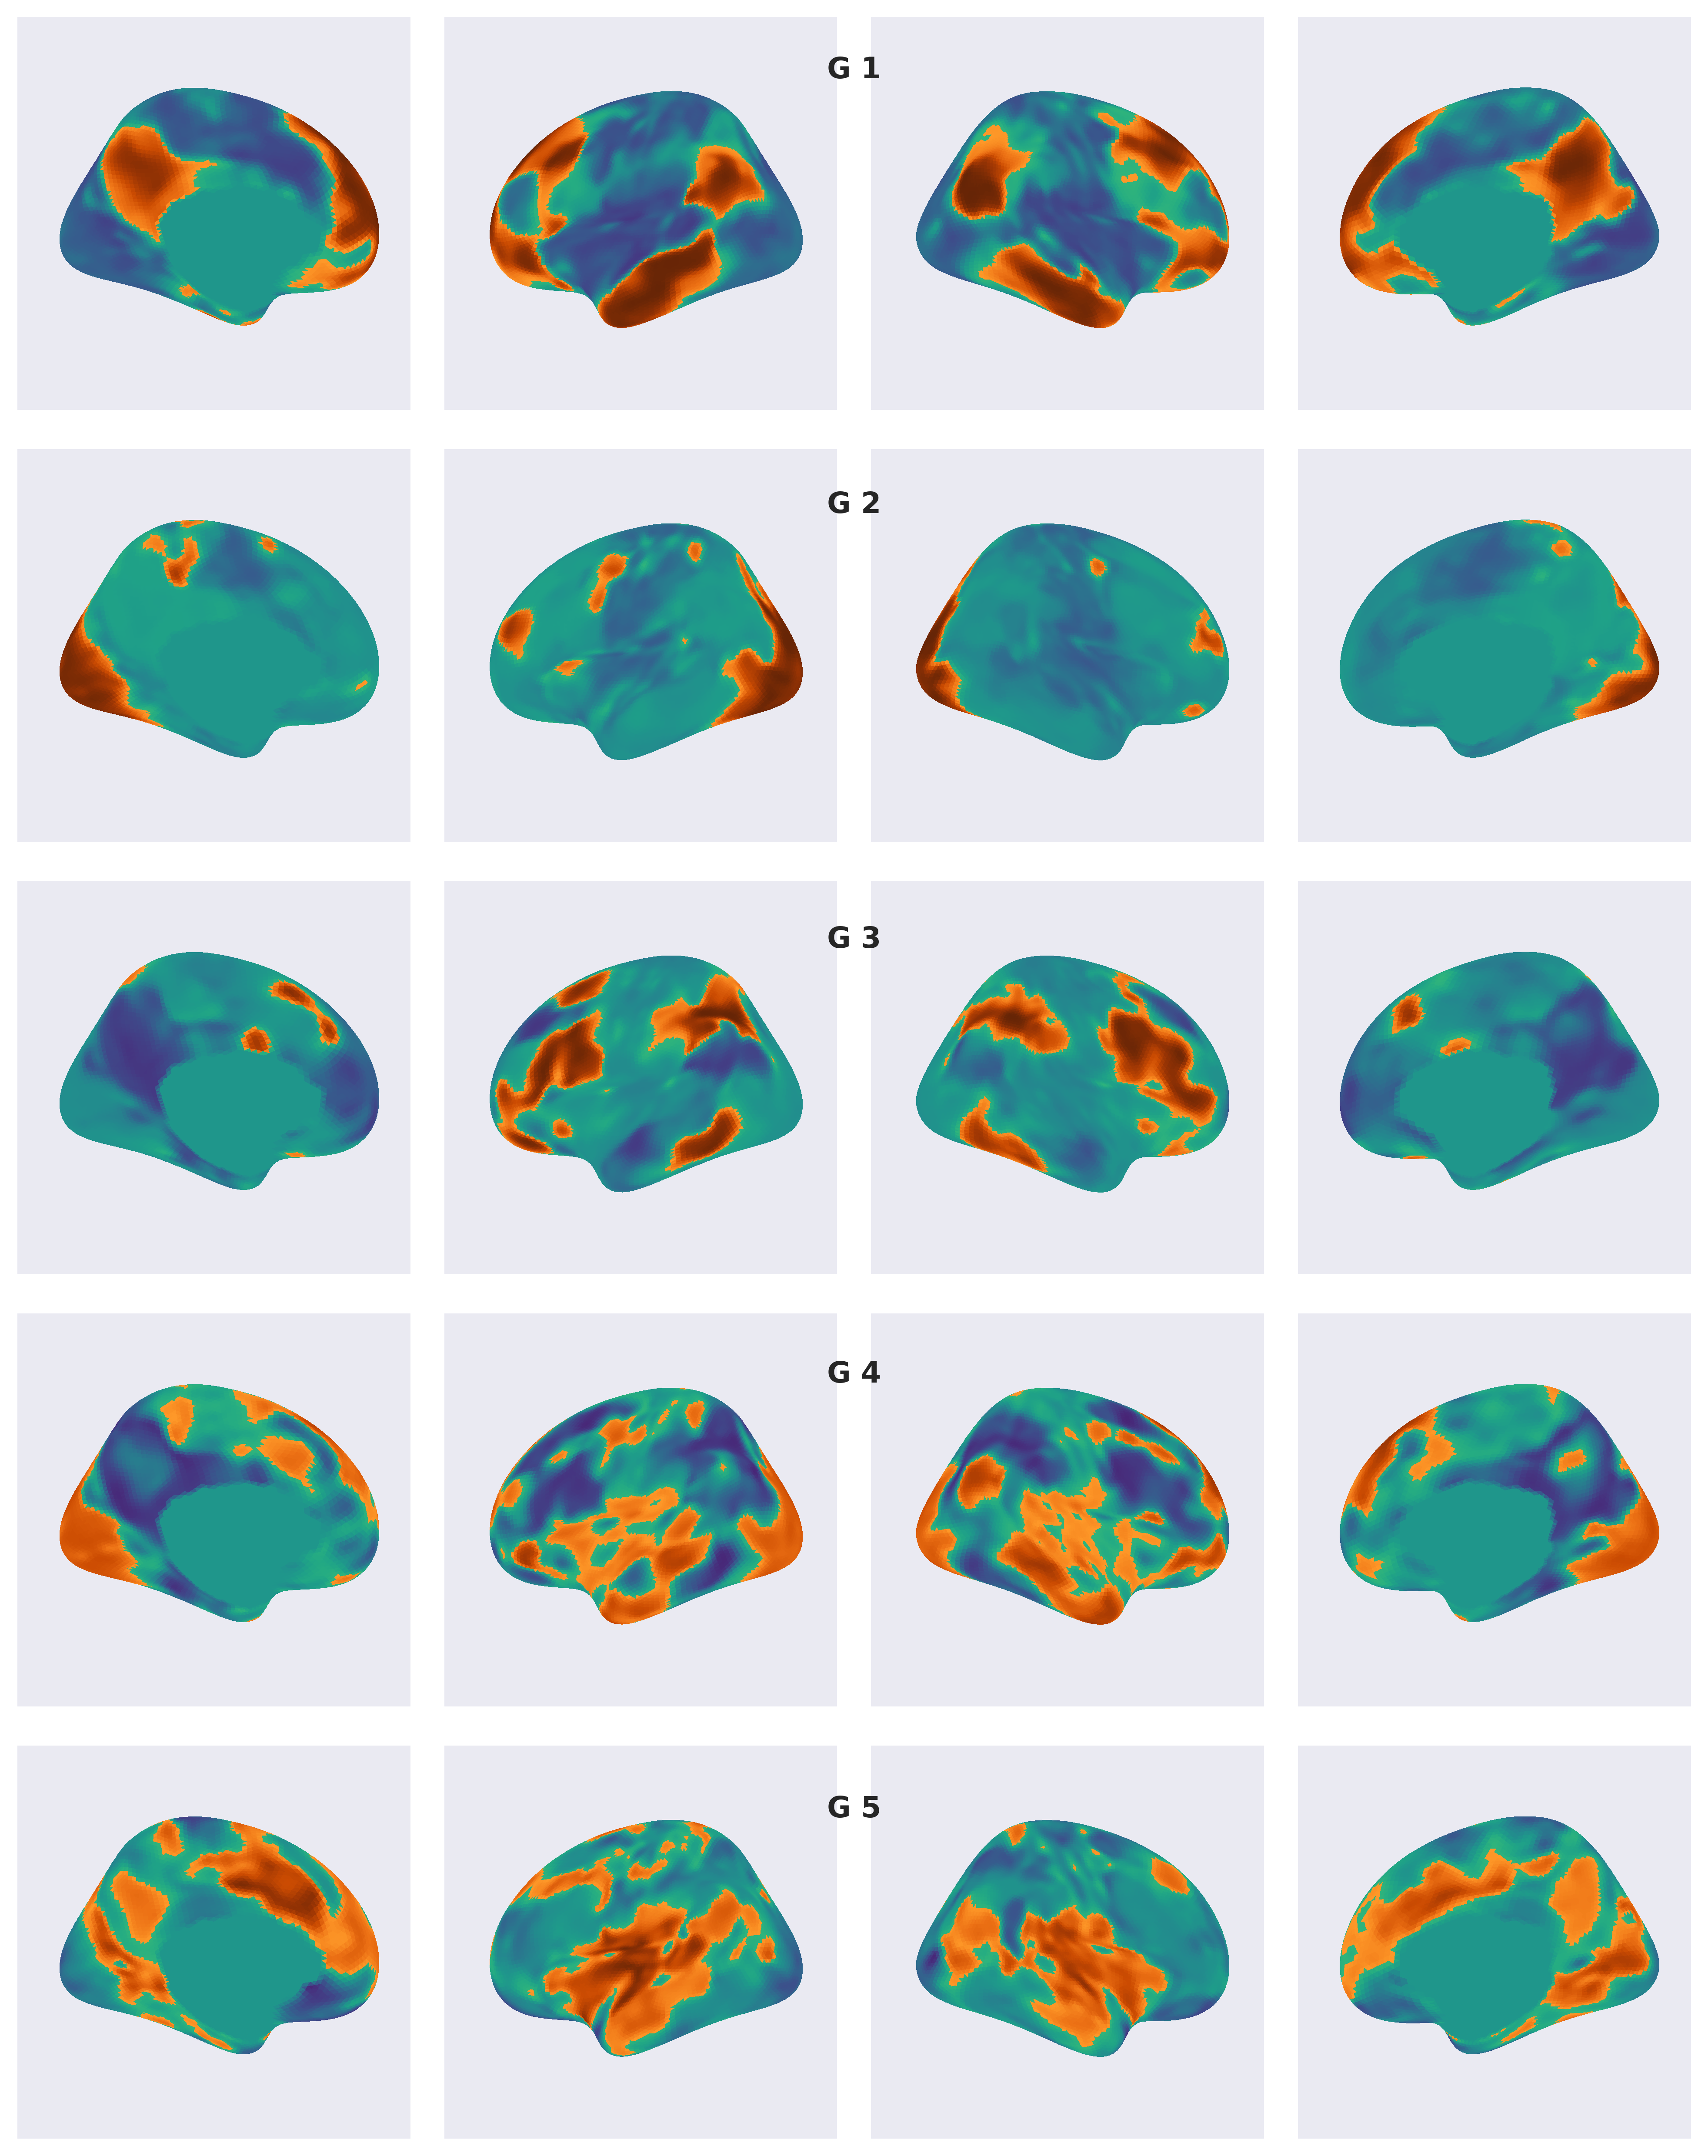

In [49]:
#Average
""" 
#     Visualize group-level average components 
#     """

n_comps = 5

n_views = 4  # number of brains to show per component
fig_width = 10

eigenVal = []
from nilearn.plotting import plot_surf_stat_map

fig = plt.figure(figsize=(fig_width, fig_width * n_comps * 0.25), dpi=400)
for component in range(n_comps):
    ax1 = fig.add_subplot(n_comps, n_views, component * n_views + 1, projection='3d')
    ax2 = fig.add_subplot(n_comps, n_views, component * n_views + 2, projection='3d')
    ax3 = fig.add_subplot(n_comps, n_views, component * n_views + 3, projection='3d')
    ax4 = fig.add_subplot(n_comps, n_views, component * n_views + 4, projection='3d')
    res = np.zeros(10242)
    res[cort_lh] = np.asarray(aligned[62][cort].T)[component,:len(cort_lh)]
    #res[cort_lh] =  np.mean(np.asarray(grad)[:,component,cort_lh],axis=0)
    #res[cort_lh] =  np.asarray(split_sets[v][k])[component][cort_lh]
    plax1 = plot_surf_stat_map(surf_lh_loc, res, hemi='left', view='medial', axes=ax1, colorbar=False, cmap=mymap1)
    plax2 = plot_surf_stat_map(surf_lh_loc, res, hemi='left', view='lateral', axes=ax2, colorbar=False, cmap=mymap1)
    res = np.zeros(10242)
    res[cort_rh] =  np.asarray(aligned[62][cort].T)[component,len(cort_lh):]
    #res[cort_rh] =  np.mean(np.asarray(grad)[:,component,cort_rh],axis=0)
    #res[cort_rh] = np.asarray(split_sets[v][k])[component][cort_rh]

    plax3 = plot_surf_stat_map(surf_rh_loc, res, hemi='right', view='lateral', axes=ax3, colorbar=False, cmap=mymap1)
    plax4 = plot_surf_stat_map(surf_rh_loc, res, hemi='right', view='medial', axes=ax4, colorbar=False, cmap=mymap1)
    plt.figtext(0.5, 0.96 - (1. / n_comps) * component, 'G %i' % int(int(component) + 1),
                horizontalalignment='center', fontsize='large',fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(hspace=0.1,wspace=0.05)
filename = f'brainspace_plot_20k_20k_Daniel.png'
plt.savefig(filename, dpi=400)
plt.show()

In [50]:
avg_grad_aligned = [None] * 5
for component in range(5):
    avg_grad_aligned[component] = np.mean(np.asarray(aligned)[:,:,component],axis=0)[cort]

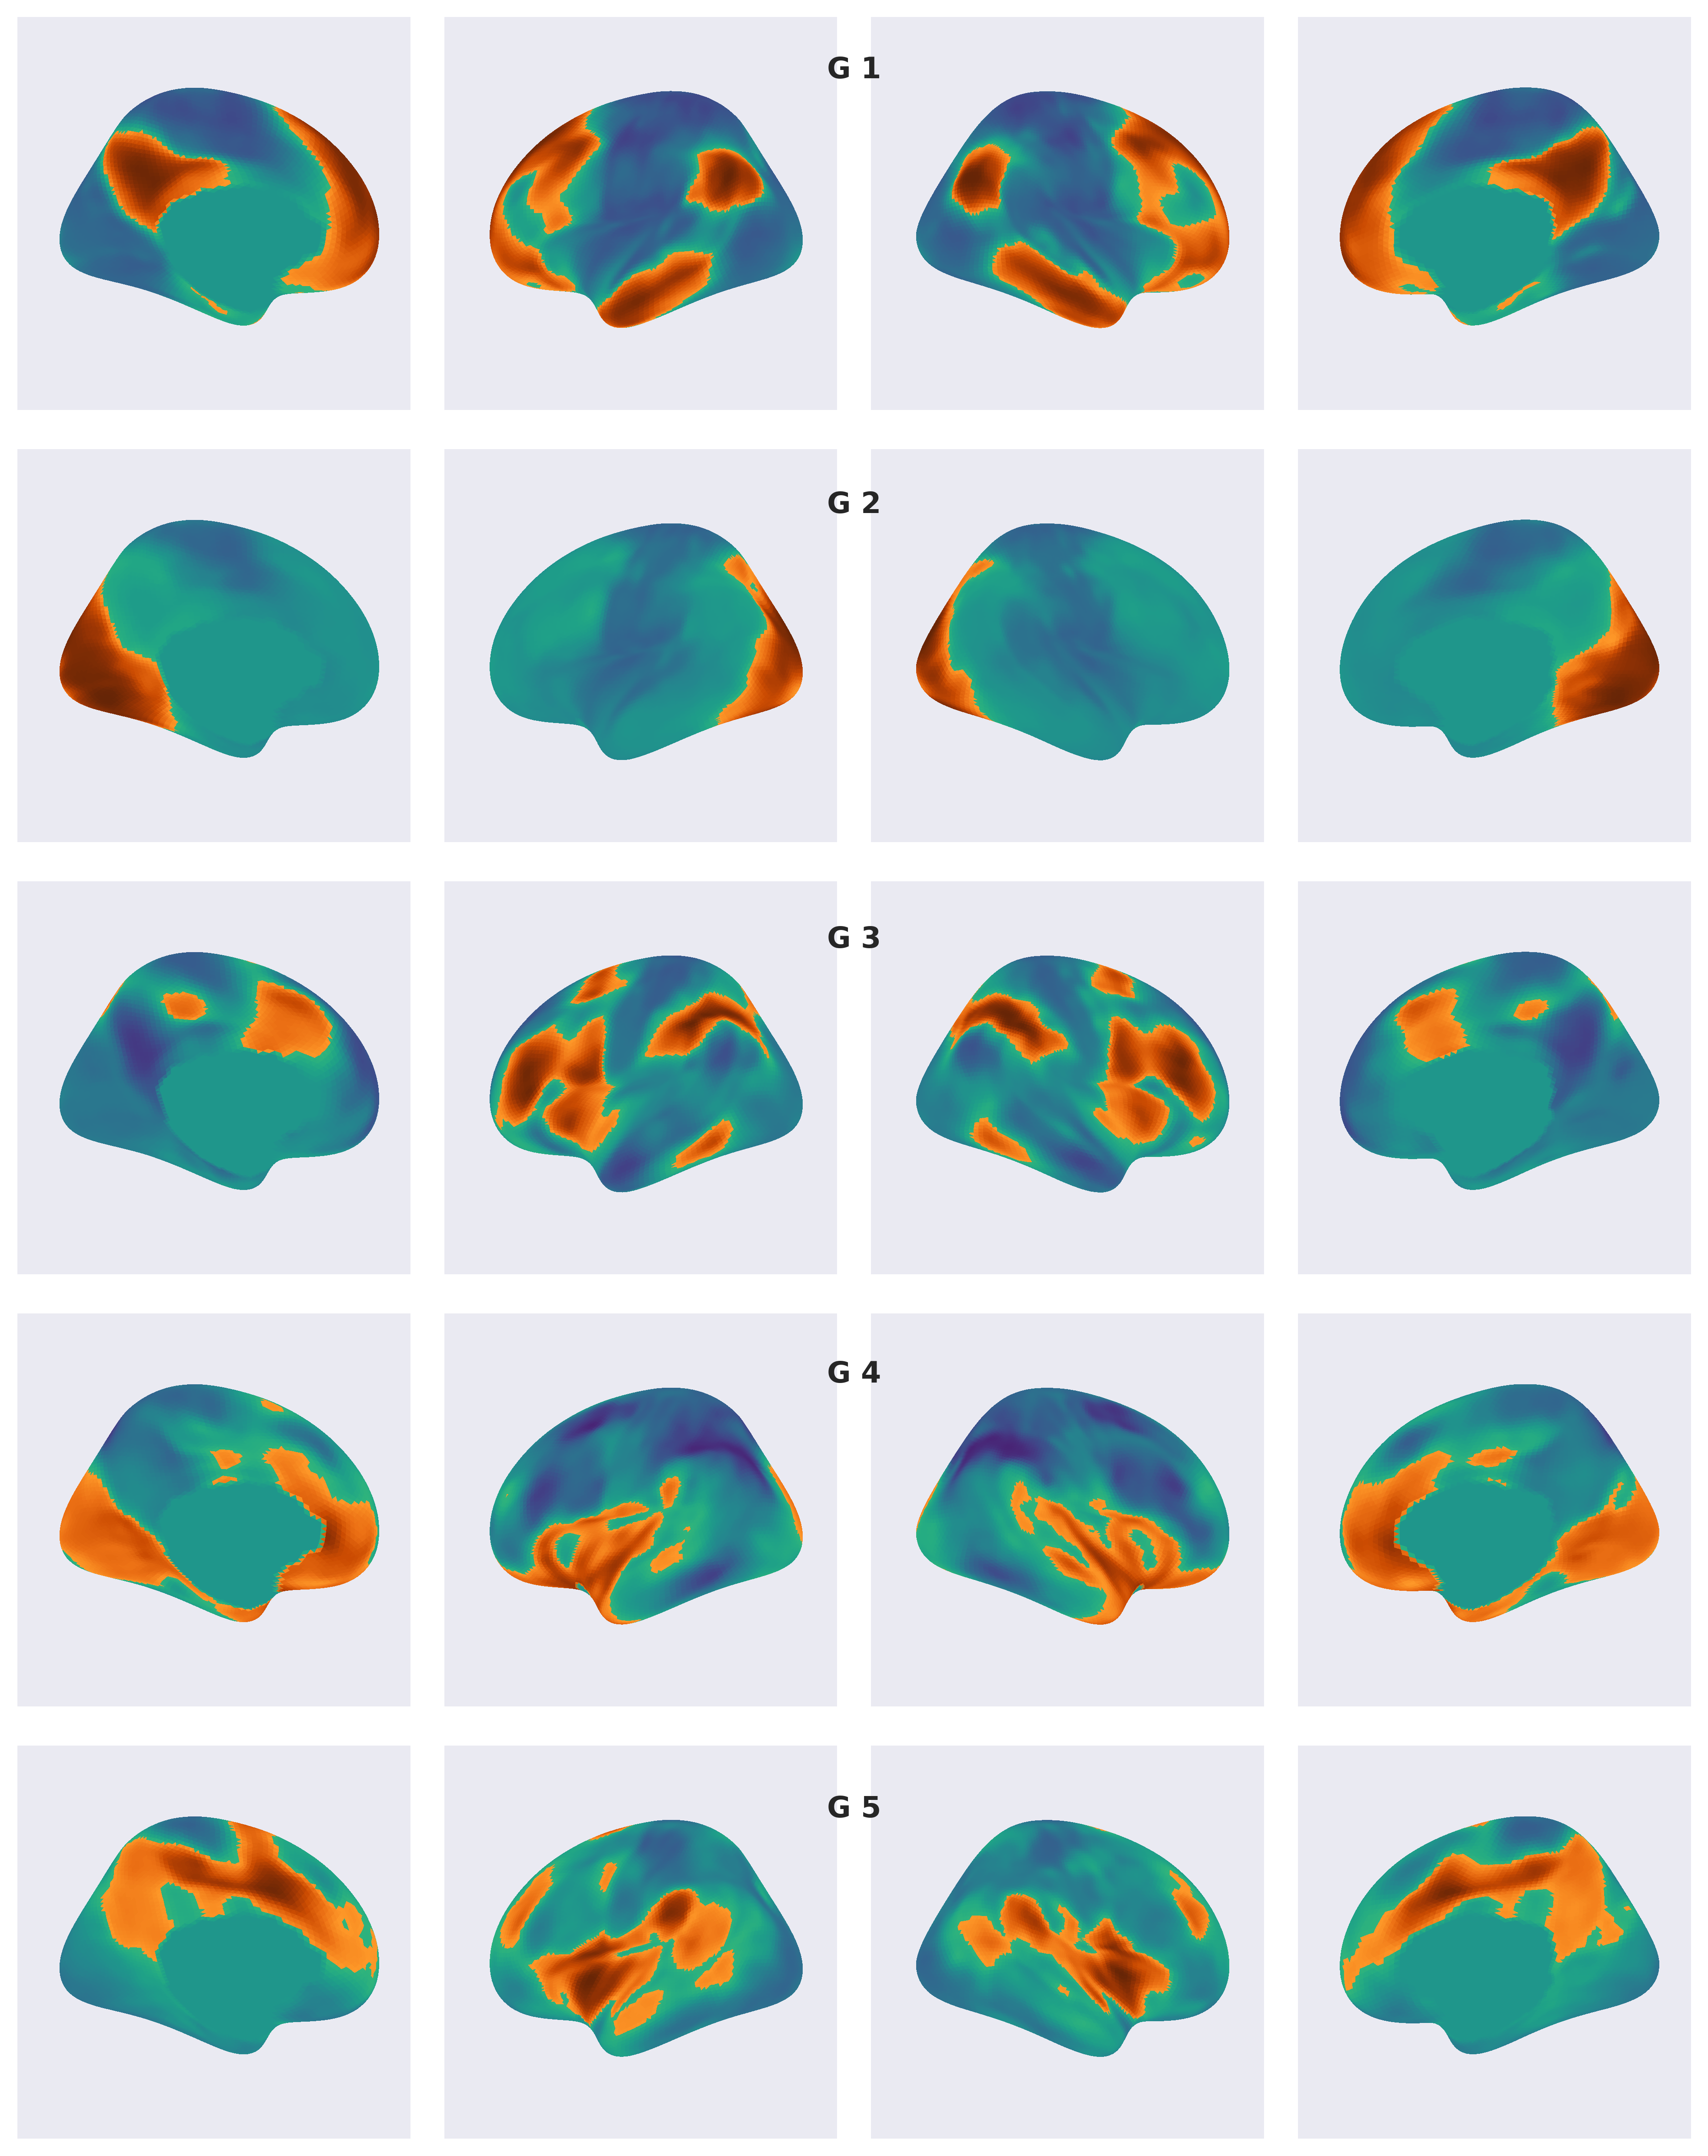

In [51]:
#Average
""" 
#     Visualize group-level average components 
#     """

n_comps = 5

n_views = 4  # number of brains to show per component
fig_width = 10

eigenVal = []
from nilearn.plotting import plot_surf_stat_map

fig = plt.figure(figsize=(fig_width, fig_width * n_comps * 0.25), dpi=400)
for component in range(n_comps):
    ax1 = fig.add_subplot(n_comps, n_views, component * n_views + 1, projection='3d')
    ax2 = fig.add_subplot(n_comps, n_views, component * n_views + 2, projection='3d')
    ax3 = fig.add_subplot(n_comps, n_views, component * n_views + 3, projection='3d')
    ax4 = fig.add_subplot(n_comps, n_views, component * n_views + 4, projection='3d')
    res = np.zeros(10242)
    res[cort_lh] = np.asarray(avg_grad_aligned)[component,:len(cort_lh)]
    #res[cort_lh] =  np.mean(np.asarray(grad)[:,component,cort_lh],axis=0)
    #res[cort_lh] =  np.asarray(split_sets[v][k])[component][cort_lh]
    plax1 = plot_surf_stat_map(surf_lh_loc, res, hemi='left', view='medial', axes=ax1, colorbar=False, cmap=mymap1)
    plax2 = plot_surf_stat_map(surf_lh_loc, res, hemi='left', view='lateral', axes=ax2, colorbar=False, cmap=mymap1)
    res = np.zeros(10242)
    res[cort_rh] =  np.asarray(avg_grad_aligned)[component,len(cort_lh):]
    #res[cort_rh] =  np.mean(np.asarray(grad)[:,component,cort_rh],axis=0)
    #res[cort_rh] = np.asarray(split_sets[v][k])[component][cort_rh]

    plax3 = plot_surf_stat_map(surf_rh_loc, res, hemi='right', view='lateral', axes=ax3, colorbar=False, cmap=mymap1)
    plax4 = plot_surf_stat_map(surf_rh_loc, res, hemi='right', view='medial', axes=ax4, colorbar=False, cmap=mymap1)
    plt.figtext(0.5, 0.96 - (1. / n_comps) * component, 'G %i' % int(int(component) + 1),
                horizontalalignment='center', fontsize='large',fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(hspace=0.1,wspace=0.05)
filename = f'AVG_brainspace_plot_20k_20k_Daniel.png'
plt.savefig(filename, dpi=400)
plt.show()

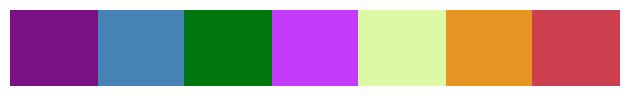

In [52]:
"""
Import Packages
"""
import os
import numpy as np
import nibabel as nib
import matplotlib.colors as colors
import seaborn as sns
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d
import pandas as pd
from nilearn import datasets
from nilearn.plotting.surf_plotting import load_surf_mesh
from nilearn.plotting import plot_surf_stat_map

convertYeo7 = [3, 6, 7, 1, 5, 2, 4]
cols7 = ((120, 18, 134),
         (70, 130, 180),
         (0, 118, 14),
         (196, 58, 250),
         (220, 248, 164),
         (230, 148, 34),
         (205, 62, 78))
cols = cols7
cols = np.asarray(cols, dtype=float) / 255
yeoColors = colors.ListedColormap(cols, name='colormapYeo')

num = 256
gradient = range(num)

for x in range(5):
    gradient = np.vstack((gradient, gradient))
fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=yeoColors, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()


def return_fsaverage_data(fsaverage_id):
    datadir = os.path.join(fsaverage_id, 'surf')
    fsaverage = dict()
    fsaverage['infl_left'] = os.path.join(datadir, 'lh.inflated')
    fsaverage['infl_right'] = os.path.join(datadir, 'rh.inflated')
    fsaverage['pial_left'] = os.path.join(datadir, 'lh.pial')
    fsaverage['pial_right'] = os.path.join(datadir, 'rh.pial')
    fsaverage['sulc_left'] = os.path.join(datadir, 'lh.sulc')
    fsaverage['sulc_right'] = os.path.join(datadir, 'rh.sulc')
    return fsaverage

def return_fsaverage_parcellation(fsaverage_id, parcellation):
    parc = os.path.join(fsaverage_id, 'label', parcellation)
    parc_labels, parc_ctab, parc_names = nib.freesurfer.read_annot(parc)
    return parc_labels, parc_ctab, parc_names


def plot_surf_inlf(fsaverage, surf_map_l, surf_map_r,
                   threshold=None, alpha=0.7, cmap='hot', vmin=None, vmax=None,
                   bg_on_data=1, output_file=None,
                   ):
    # Import libraries
    import nibabel
    import numpy as np
    import matplotlib.pyplot as plt

    from mpl_toolkits.mplot3d import Axes3D
    from nibabel import gifti

    from nilearn.plotting.img_plotting import _get_colorbar_and_data_ranges
    from nilearn.plotting.surf_plotting import load_surf_data, load_surf_mesh

    # load mesh and derive axes limits
    mesh_left = load_surf_mesh(fsaverage['infl_left'])
    mesh_right = load_surf_mesh(fsaverage['infl_right'])

    coords_left, faces_left = mesh_left[0], mesh_left[1]
    coords_right, faces_right = mesh_right[0], mesh_right[1]

    # limits = [-65, 33]
    limits = [-150, 50]

    avg_method = 'mean'
    darkness = 0.3

    # if no cmap is given, set to matplotlib default
    if cmap is None:
        cmap = plt.cm.get_cmap(plt.rcParamsDefault['image.cmap'])
    # else:
    #     # if cmap is given as string, translate to matplotlib cmap
    #     if isinstance(cmap, _basestring):
    #         cmap = plt.cm.get_cmap(cmap)

    def subplot(surf_map, bg_map, subplot_id, coords, faces, elev, azim, vmin=vmin, vmax=vmax, bg_on_data=bg_on_data):

        ax = fig.add_subplot(subplot_id, projection='3d', xlim=limits, ylim=limits)
        ax.view_init(elev=elev, azim=azim)
        ax.set_axis_off()
        p3dcollec = ax.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2], triangles=faces, linewidth=0.,
                                    antialiased=False, color='red')

        # If depth_map and/or surf_map are provided, map these onto the surface
        # set_facecolors function of Poly3DCollection is used as passing the
        # facecolors argument to plot_trisurf does not seem to work
        if bg_map != None or surf_map != None:

            face_colors = np.ones((faces.shape[0], 4))
            # face_colors[:, :3] = .5*face_colors[:, :3]  # why this?

            if bg_map != None:
                bg_data = load_surf_data(bg_map)
                if bg_data.shape[0] != coords.shape[0]:
                    raise ValueError('The bg_map does not have the same number '
                                     'of vertices as the mesh.')
                bg_faces = np.mean(bg_data[faces], axis=1)
                bg_faces = bg_faces - bg_faces.min()
                bg_faces = bg_faces / bg_faces.max()
                # control background darkness
                bg_faces *= darkness
                face_colors = plt.cm.gray_r(bg_faces)

            # modify alpha values of background
            face_colors[:, 3] = alpha * face_colors[:, 3]
            # should it be possible to modify alpha of surf data as well?

            if surf_map != None:
                surf_map_data = surf_map  # load_surf_data(surf_map)
                if len(surf_map_data.shape) != 1:
                    raise ValueError('surf_map can only have one dimension but has'
                                     '%i dimensions' % len(surf_map_data.shape))
                if surf_map_data.shape[0] != coords.shape[0]:
                    raise ValueError('The surf_map does not have the same number '
                                     'of vertices as the mesh.')

                # create face values from vertex values by selected avg methods
                if avg_method == 'mean':
                    surf_map_faces = np.mean(surf_map_data[faces], axis=1)
                elif avg_method == 'median':
                    surf_map_faces = np.median(surf_map_data[faces], axis=1)

                # if no vmin/vmax are passed figure them out from data
                if vmin is None:
                    vmin = np.nanmin(surf_map_faces)
                if vmax is None:
                    vmax = np.nanmax(surf_map_faces)

                # treshold if inidcated
                if threshold is None:
                    kept_indices = np.where(surf_map_faces)[0]
                else:
                    kept_indices = np.where(np.abs(surf_map_faces) >= threshold)[0]

                surf_map_faces = surf_map_faces - vmin
                surf_map_faces = surf_map_faces / (vmax - vmin)

                # multiply data with background if indicated
                if bg_on_data:
                    face_colors[kept_indices] = cmap(surf_map_faces[kept_indices]) \
                                                * face_colors[kept_indices]
                else:
                    face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])

            p3dcollec.set_facecolors(face_colors)

    fig = plt.figure(figsize=(65, 20))

    subplot(surf_map_l, fsaverage['sulc_left'], 141, coords_left, faces_left, elev=0, azim=180, bg_on_data=bg_on_data)
    subplot(surf_map_l, fsaverage['sulc_left'], 142, coords_left, faces_left, elev=0, azim=0, bg_on_data=bg_on_data)
    subplot(surf_map_r, fsaverage['sulc_right'], 143, coords_right, faces_right, elev=0, azim=180,
            bg_on_data=bg_on_data)
    subplot(surf_map_r, fsaverage['sulc_right'], 144, coords_right, faces_right, elev=0, azim=0, bg_on_data=bg_on_data)

    plt.tight_layout()
    filename = 'YeoGroup.png'
    fig.savefig(filename, dpi=400)
    # save figure if output file is given
    if output_file != None:
        fig.savefig(output_file)
        plt.close(fig)
    filename = 'YeoGroup.png'
    fig.savefig(filename, dpi=400)
    return fig

In [53]:
DK_lh_labels, DK_lh_ctab, DK_lh_names = return_fsaverage_parcellation('/home/smadarlab/freesurfer/subjects/fsaverage5/','lh.Yeo2011_7Networks_N1000.annot')
DK_rh_labels, DK_rh_ctab, DK_rh_names = return_fsaverage_parcellation('/home/smadarlab/freesurfer/subjects/fsaverage5/','rh.Yeo2011_7Networks_N1000.annot')

names = np.concatenate([DK_lh_names, DK_rh_names])
Yeo_lh_cor =  DK_lh_labels[cort_lh]
# Yeo_lh_cor= np.where(audi_lh!=0,8,Yeo_lh_cor)
Yeo_rh_cor = DK_rh_labels[cort_rh]
# Yeo_rh_cor= np.where(audi_rh!=0,8,Yeo_rh_cor)

Yeo_labels = np.concatenate((Yeo_lh_cor, Yeo_rh_cor))
res = np.zeros(10242)

In [62]:
"""average G1G2G3"""
G2 = []
for i in range(2,3):
    merageG = []
    for j in range (np.shape(np.array(aligned))[0]):
        merageG.append(aligned[j][cort].T[i])
G2 = np.swapaxes(merageG,1,0)

#G2 = np.asarray(merageG)
G2WithYeo= np.column_stack((G2,Yeo_labels))
col= []
for j in range(1,4):
    for i in range (0,30):
        newWord = ("sub-{}-ses-{}".format(i+1,j))
        col.append(newWord)

col.append("Yeo")
print(np.shape(G2))
yeonets = {1:'VN', 2:'SMN', 3:'DAN', 4:'SN', 5:'LN', 6:'FPN', 7:'DMN',8:'AUD'}
savefile= pd.DataFrame(G2WithYeo,columns=col)
savefile['YeoNets'] = savefile['Yeo'].map(yeonets)
savefile.to_csv('G3_results_BS_p_20K_20K_Dan.csv')

(18715, 90)
